# Import Packages and Raw Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.dates as mdates
import statsmodels.api as sm
import os
import pylab
from sklearn import metrics
from scipy import stats
from scipy.stats import kstest
from scipy.stats import norm, uniform
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
from google.colab import drive
drive.mount('/content/drive')

<ipython-input-1-33a8e325c681>:17: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr
<ipython-input-1-33a8e325c681>:18: DeprecationWarning: Please import `spearmanr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import spearmanr


Mounted at /content/drive


In [ ]:
#import the Raw Data
crude_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks 2/Python/Europe_Brent_Spot_Price_FOB.csv')
gdp_raw = pd.read_excel('/content/drive/MyDrive/Colab Notebooks 2/Python/GDP-3.xlsx', sheet_name="Quarterly")
cpi_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks 2/Python/cpi_monthly.csv')
reliance_raw = pd.read_excel('/content/drive/MyDrive/Colab Notebooks 2/Python/Reliance on Russian imports - PUBLIC (1).xlsx', sheet_name="Reliance_Fuel")

In [ ]:
#checking data type

#Crude Raw Data
crude_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 2 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Month                                           427 non-null    object 
 1   Europe Brent Spot Price FOB Dollars per Barrel  427 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.8+ KB


In [ ]:
#GDP Raw Data
gdp_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 53 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  96 non-null     object
 1   Scale    96 non-null     object
 2   2010Q1   96 non-null     object
 3   2010Q2   96 non-null     object
 4   2010Q3   96 non-null     object
 5   2010Q4   96 non-null     object
 6   2011Q1   96 non-null     object
 7   2011Q2   96 non-null     object
 8   2011Q3   96 non-null     object
 9   2011Q4   96 non-null     object
 10  2012Q1   96 non-null     object
 11  2012Q2   96 non-null     object
 12  2012Q3   96 non-null     object
 13  2012Q4   96 non-null     object
 14  2013Q1   96 non-null     object
 15  2013Q2   96 non-null     object
 16  2013Q3   96 non-null     object
 17  2013Q4   96 non-null     object
 18  2014Q1   96 non-null     object
 19  2014Q2   96 non-null     object
 20  2014Q3   96 non-null     object
 21  2014Q4   96 non-null     object
 22  2015

In [ ]:
#CPI Raw Data
cpi_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4237 entries, 0 to 4236
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    4237 non-null   object 
 1   INDICATOR   4237 non-null   object 
 2   SUBJECT     4237 non-null   object 
 3   MEASURE     4237 non-null   object 
 4   FREQUENCY   4237 non-null   object 
 5   TIME        4237 non-null   object 
 6   Value       4237 non-null   float64
 7   Flag Codes  0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 264.9+ KB


In [ ]:
#Reliance Raw Data
reliance_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   COUNTRY  129 non-null    object 
 1   PRODUCT  129 non-null    object 
 2   1990     129 non-null    float64
 3   1991     129 non-null    float64
 4   1992     129 non-null    float64
 5   1993     129 non-null    float64
 6   1994     129 non-null    float64
 7   1995     129 non-null    float64
 8   1996     129 non-null    float64
 9   1997     129 non-null    float64
 10  1998     129 non-null    float64
 11  1999     129 non-null    float64
 12  2000     129 non-null    float64
 13  2001     129 non-null    float64
 14  2002     129 non-null    float64
 15  2003     129 non-null    float64
 16  2004     129 non-null    float64
 17  2005     129 non-null    float64
 18  2006     129 non-null    float64
 19  2007     129 non-null    float64
 20  2008     129 non-null    float64
 21  2009     129 non

# Cleaning Data

In [ ]:
#Crude Oil Price Raw Data

#change the data type
crude_raw['Month']=pd.to_datetime(crude_raw['Month']).dt.strftime('%Y-%m')

#filter crude data based on range time that we need : 2010 - 2022
crude_df_month=crude_raw[crude_raw['Month'] >= '2010-01'].rename(
    columns = {"Europe Brent Spot Price FOB Dollars per Barrel":
               "Brent_Spot_Price",
               'Month':'TIME'}) #Dollar per Barrel

#convert to quartely
crude_df=crude_df_month.groupby(pd.PeriodIndex(crude_df_month.TIME,
                                               freq='Q')).mean().reset_index()
crude_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype        
---  ------            --------------  -----        
 0   TIME              52 non-null     period[Q-DEC]
 1   Brent_Spot_Price  52 non-null     float64      
dtypes: float64(1), period[Q-DEC](1)
memory usage: 960.0 bytes


<ipython-input-11-d41b91c7d496>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  freq='Q')).mean().reset_index()


In [ ]:
#GDP Raw Data

#filter countries that we want
countries = ["Italy","India","Türkiye, Rep of","China, P.R.: Mainland",
             "Netherlands, The","Germany","Poland, Rep. of"]
#filter by location, time, and quarter
gdp_filter = gdp_raw[gdp_raw["Country"].isin(countries)].drop(columns=['Scale'])
gdp_df = gdp_filter.melt(id_vars=["Country"], var_name="TIME",
                         value_name="GDP").sort_values(["Country",
                                              "TIME"]).reset_index(drop=True)

#renamed specific elements
gdp_df['Country']=gdp_df['Country'].replace({"China, P.R.: Mainland": "CHN",
                                             "Germany": "DEU", "India" :"IND",
                                             "Italy":"ITA",
                                             "Netherlands, The":"NLD",
                                             "Poland, Rep. of":"POL",
                                             "Türkiye, Rep of": "TUR"})
#change the data type
gdp_df['GDP'] = pd.to_numeric(gdp_df['GDP'])
gdp_df['TIME'] = pd.PeriodIndex(gdp_df.TIME, freq='Q')


#check missing value
gdp_df.isna().any() #doesnt have the null data

gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype        
---  ------   --------------  -----        
 0   Country  357 non-null    object       
 1   TIME     357 non-null    period[Q-DEC]
 2   GDP      357 non-null    float64      
dtypes: float64(1), object(1), period[Q-DEC](1)
memory usage: 8.5+ KB


In [ ]:
#CPI Raw Data

#change the data type
cpi_raw['TIME']=pd.to_datetime(cpi_raw['TIME']).dt.strftime('%Y-%m')

#filter raw data from 2010 - 2022 and 7 countries that we need it
cpi_df=cpi_raw[cpi_raw['TIME'] >= '2010-01'].rename(
    columns={"LOCATION":"Country","Value":"CPI"})
cpi_df=cpi_df[cpi_df.Country.isin(["DEU","CHN","IND","ITA","NLD","POL","TUR"])]\
.drop(['INDICATOR', 'SUBJECT','MEASURE','FREQUENCY','Flag Codes'], axis=1)

#checking the null data
cpi_df_pivot= cpi_df.pivot_table(index='TIME', columns='Country', values='CPI')
cpi_df_pivot.reset_index(inplace=True)

cpi_df_pivot.isna().any()
cpi_df_pivot.isna().sum()

#fill in the null data
#we decided to use the mean to fill in the missing data (average in 2022 in india)
ind_avg = cpi_df_pivot.groupby(pd.PeriodIndex(cpi_df_pivot.TIME,
                                              freq='Y')).mean().iat[12,2]
cpi_df_pivot = cpi_df_pivot.fillna(ind_avg)

#change structure data frame
cpi_df = cpi_df_pivot.melt(id_vars=["TIME"], var_name="Country",
                           value_name="CPI").sort_values(["Country", "TIME"])\
                           .reset_index(drop=True)

#convert to quartely
cpi_df=cpi_df.groupby(['Country',pd.PeriodIndex(cpi_df.TIME,
                                                freq='Q')]).mean().reset_index()
cpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype        
---  ------   --------------  -----        
 0   Country  364 non-null    object       
 1   TIME     364 non-null    period[Q-DEC]
 2   CPI      364 non-null    float64      
dtypes: float64(1), object(1), period[Q-DEC](1)
memory usage: 8.7+ KB


<ipython-input-13-96837a6f7d4a>:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  freq='Y')).mean().iat[12,2]
<ipython-input-13-96837a6f7d4a>:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  freq='Q')]).mean().reset_index()


In [ ]:
#Reliance Raw Data
countries = ["ITALY","NETHLAND","GERMANY","POLAND"]
reliance_df = reliance_raw[reliance_raw["COUNTRY"]\
                           .isin(countries)][reliance_raw.PRODUCT == "MTOTOIL"]
reliance_df = reliance_df.iloc[:,[0,1,22,32]]
reliance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 46 to 97
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   COUNTRY  4 non-null      object 
 1   PRODUCT  4 non-null      object 
 2   2010     4 non-null      float64
 3   2020E    4 non-null      float64
dtypes: float64(2), object(2)
memory usage: 160.0+ bytes


<ipython-input-14-2f28bf7f7c19>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  reliance_df = reliance_raw[reliance_raw["COUNTRY"]\


In [ ]:
#Merge Data Frame from Brent Spot Price, GDP and CPI
all_df=pd.merge(pd.merge(gdp_df,cpi_df, on=["TIME", "Country"]),crude_df,on='TIME')
all_df=all_df.assign(const=1)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 356
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype        
---  ------            --------------  -----        
 0   Country           357 non-null    object       
 1   TIME              357 non-null    period[Q-DEC]
 2   GDP               357 non-null    float64      
 3   CPI               357 non-null    float64      
 4   Brent_Spot_Price  357 non-null    float64      
 5   const             357 non-null    int64        
dtypes: float64(3), int64(1), object(1), period[Q-DEC](1)
memory usage: 19.5+ KB


# Plotting Data
[https://seaborn.pydata.org/tutorial/relational.html](https://)
[https://plotly.com/python/facet-plots/](https://)

## Plotting Data Crude Oil Price

In [ ]:
#plotting crude oil price

fig1 = px.line(crude_df_month, x='TIME', y="Brent_Spot_Price", title="Europe Brent Crude Oil Price Monthly Trend")

annotations = [
    {'x': '2014-03', 'y': 107.48, 'text': 'Start of The Crimea Annexation', 'showarrow': True, 'arrowhead': 1, 'xanchor': "right", 'yanchor': "bottom", 'bgcolor': "#EEE8AA"},
    {'x': '2014-06', 'y': 111.18, 'text': 'Max Price', 'showarrow': True, 'arrowhead': 1, 'xanchor': "left", 'bgcolor': "#EEE8AA"},
    {'x': '2015-01', 'y': 47.76, 'text': 'After effect of the Crimea Annexation', 'showarrow': True, 'arrowhead': 1, 'xanchor': "right", 'bgcolor': "#EEE8AA"},
    {'x': '2022-02', 'y': 97.13, 'text': 'Start of the War (Russia Vs Ukraine)', 'showarrow': True, 'arrowhead': 1, 'xanchor': "right", 'bgcolor': "#EEE8AA"},
    {'x': '2022-06', 'y': 122.71, 'text': 'Max Price', 'showarrow': True, 'arrowhead': 1, 'bgcolor': "#EEE8AA"},
    {'x': '2022-11', 'y': 91.42, 'text': 'After The War', 'showarrow': True, 'arrowhead': 1, 'bgcolor': "#EEE8AA", 'yanchor': "bottom"}
]

for annotation in annotations:
    fig1.add_annotation(**annotation)
fig1.show()

## Plotting Data CPI

In [ ]:
#Plotting CPI Europe Vs CPI Non-Europe
cpi_df_pivot['EU'] = cpi_df_pivot[['DEU', 'ITA', 'NLD', 'POL']].mean(axis=1)
fig2 = px.line(cpi_df_pivot, x="TIME", y=["EU","CHN","IND","TUR"],
              hover_data={"TIME": "|%B, %Y"},
              labels={'value':'CPI','TIME':'Quarter'},
              title='CPI Europe VS 3 Other Countries')
fig2.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(step="all")
        ])
    )
)
#fig2.update_layout({
#    'plot_bgcolor': 'rgba(0,0,0,0)',
#    'paper_bgcolor': 'rgba(0,0,0,0)',
#    'font_color':'#FFFFFF',
#    'xaxis_rangeselector_font_color':'black'})
fig2.show()

## Plotting GDP Data

In [ ]:
#Plotting GDP based on CPI Conditions
fig3 = px.bar(all_df, x=pd.PeriodIndex(all_df.TIME, freq='Q').to_timestamp(),y='GDP', color='Country', labels={'GDP':'GDP Nominal','x':'Quarter'},barmode='group', text_auto = '3.s',
            title='Evolution of world GDP')
fig3.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(step="all")
        ])
    )
)

#fig3.update_layout({
#    'plot_bgcolor': 'rgba(0,0,0,0)',
#    'paper_bgcolor': 'rgba(0,0,0,0)',
#    'font_color':'#FFFFFF',
#    'xaxis_rangeselector_font_color':'black'})
fig3.show()

## Scatterplot CPI vs Brent Spot Price

In [ ]:
#Scatterplot CPI vs Brent Spot Price
fig4 = px.scatter(all_df, x="Brent_Spot_Price", y="CPI",color="Country")
#fig4.update_layout({
#    'plot_bgcolor': 'rgba(0,0,0,0)',
#    'paper_bgcolor': 'rgba(0,0,0,0)',
#    'font_color':'#FFFFFF'})
fig4.show()

In [ ]:
#Scatterplot CPI vs Brent Spot Price based on Country
fig5 = px.scatter(all_df, x="Brent_Spot_Price", y="CPI", color="Country", facet_col="Country",facet_col_wrap=4,trendline="ols")
# fig5.update_layout({
#    'plot_bgcolor': 'rgba(0,0,0,0)',
#    'paper_bgcolor': 'rgba(0,0,0,0)',
#    'font_color':'#FFFFFF'})
fig5.show()

## Scatterplot GDP vs Brent Spot Price

In [ ]:
#Scatterplot GDP vs Brent Spot Price
fig6 = px.scatter(all_df, x="Brent_Spot_Price", y="GDP", color="Country")
#fig6.update_layout({
#    'plot_bgcolor': 'rgba(0,0,0,0)',
#    'paper_bgcolor': 'rgba(0,0,0,0)',
#    'font_color':'#FFFFFF'})
fig6.show()

In [ ]:
#Scatterplot GDP vs Brent Spot Price on Country
fig7 = px.scatter(all_df, x="Brent_Spot_Price", y="GDP", color="Country", facet_col="Country",facet_col_wrap=4,trendline="ols")
#fig7.update_layout({
#    'plot_bgcolor': 'rgba(0,0,0,0)',
#    'paper_bgcolor': 'rgba(0,0,0,0)',
#    'font_color':'#FFFFFF'})
fig7.show()

## Plotting Data Reliance on Russian Imports

In [ ]:
import plotly.express as px
fig8 = px.bar(reliance_df, x="COUNTRY", y=[2010,'2020E'], title='Reliance of European countries on Russian imports',
              labels={'value':'Value','COUNTRY':'Country'},barmode='group')
fig8.update_layout(
    font_family="Arial",
    #font_color="white",
    title_font_size= 20,
    title_font_family="Arial",
    font_size = 15,
    #title_font_color="white",
    #legend_title_font_color="white",
    legend_font_size = 15
)
fig8.update_xaxes(title_font_family="Arial")


#fig8.update_layout({
#    'plot_bgcolor': 'rgba(0,0,0,0)',
#    'paper_bgcolor': 'rgba(0,0,0,0)'})
fig8.show()

# Statistics Inference

## Correlation

### Correlation Crude Price and CPI : Check Assumption and Interpretation

[https://regenerativetoday.com/how-to-present-the-relationships-amongst-multiple-variables-with-charts-and-plots-in-python/](https://)

[https://www.statology.org/kolmogorov-smirnov-test-python/](https://)

[https://seaborn.pydata.org/tutorial/axis_grids.html#using-custom-functions](https://)

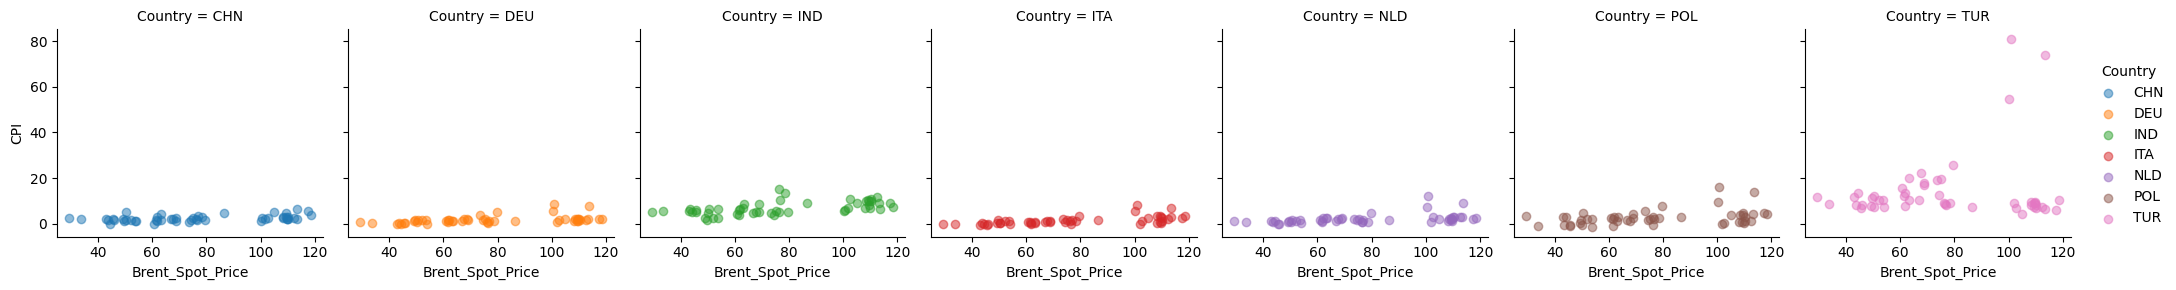

In [ ]:
#Scatterplot between Crude Price and GDP
sns.FacetGrid(all_df, col = "Country", hue="Country").map(plt.scatter, "Brent_Spot_Price", "CPI", alpha =0.5).add_legend()

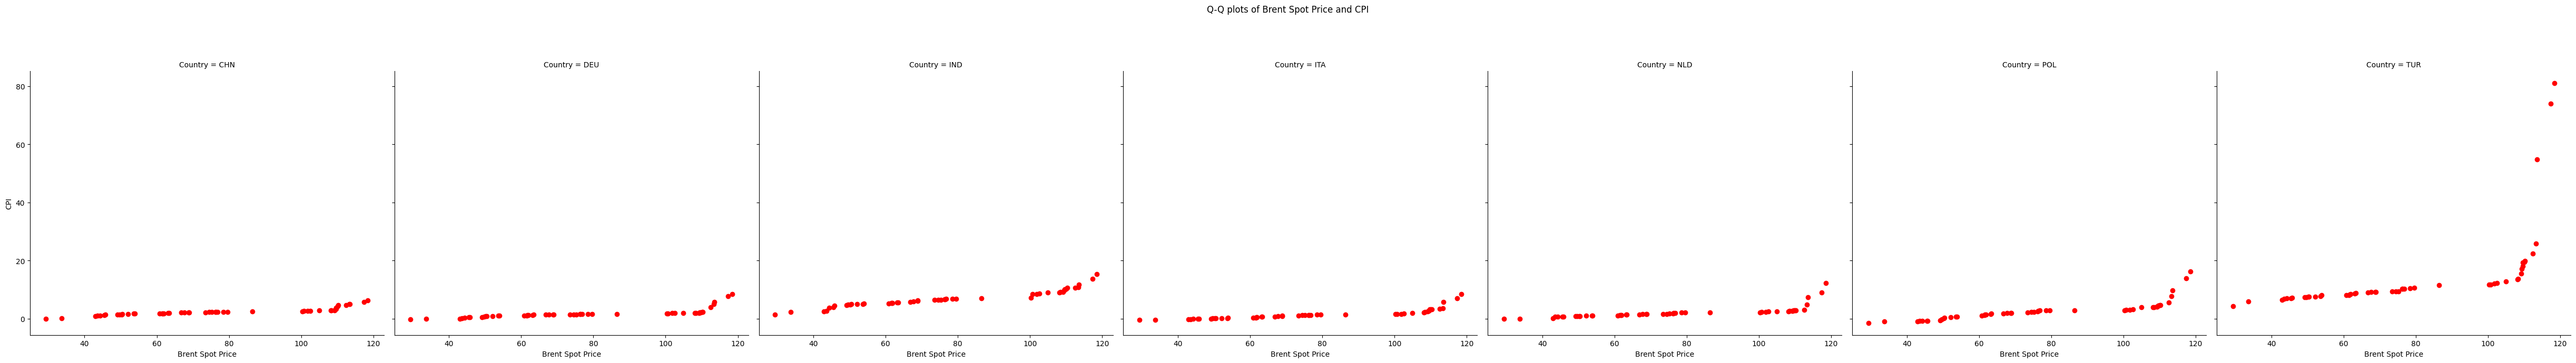

In [ ]:
#Check normal distribution using QQ Plot
def qqplot(x, y,color, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, color=color,**kwargs)

fig5 = sns.FacetGrid(all_df, col="Country",height=7)
fig5.map(qqplot, "Brent_Spot_Price", "CPI", color="red")
#Add labels without underscores
fig5.set_axis_labels('Brent Spot Price', 'CPI')
#Set title of the graphic
fig5.fig.suptitle('Q-Q plots of Brent Spot Price and CPI')

# Add a space between the title and the plots
plt.subplots_adjust(top=0.8)

In [ ]:
corr_cpi_df = cpi_df_pivot.merge(crude_df_month, on = 'TIME', how = 'left')
corr_cpi_df = corr_cpi_df.groupby(pd.PeriodIndex(corr_cpi_df.TIME, freq='Q')).mean().reset_index().drop(columns=['EU'])

<ipython-input-26-c4b2c58b5c36>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
corr_cpi_df

,TIME,CHN,DEU,IND,ITA,NLD,POL,TUR,Brent_Spot_Price
0,2010Q1,2.200000,0.811158,15.315320,1.290162,0.884208,3.000000,9.291292,76.250000
1,2010Q2,2.933333,1.113157,13.655367,1.404812,0.970348,2.300000,9.220530,78.510000
2,2010Q3,3.466667,1.110841,10.314165,1.618780,1.559226,2.166667,8.382584,76.820000
3,2010Q4,4.700000,1.379300,9.165920,1.786077,1.688121,2.866667,7.436030,86.466667
4,2011Q1,5.066667,1.876881,8.983128,2.338385,1.864219,3.833333,4.347629,104.960000
5,2011Q2,5.733333,2.001368,8.917795,2.671351,2.118154,4.566667,5.891010,117.360000
6,2011Q3,6.266667,2.197104,9.157200,2.805882,2.870858,4.100000,6.372954,113.340000
7,2011Q4,4.600000,2.223464,8.406470,3.300181,2.507398,4.566667,9.196142,109.396667
8,2012Q1,3.766667,2.138716,7.178455,3.249964,2.478452,4.100000,10.491467,118.490000
9,2012Q2,2.866667,1.864028,10.142797,3.284555,2.205494,3.966667,9.429002,108.416667


In [ ]:
#Check normal distribution using Kolmogorov Smirnov Test

countries = ['CHN', 'TUR', 'IND', 'DEU', 'NLD', 'POL', 'ITA']

# Initialize lists to store the p-values and results
pvalues = []
results = []

for country in countries:
    k_stat, k_pvalue = kstest(corr_cpi_df[country], 'norm')
    pvalues.append(k_pvalue)
    if k_pvalue > 0.05:
        results.append('Normal Distribution')
    else:
        results.append('Not Normal Distribution')

# Create the dataframe
dks = {'Country': countries, 'p-value': pvalues, 'alpha': 0.05}
all_dks = pd.DataFrame(dks)
all_dks['Result'] = results
all_dks

,Country,p-value,alpha,Result
0,CHN,3.831413e-37,0.05,Not Normal Distribution
1,TUR,7.218958e-269,0.05,Not Normal Distribution
2,IND,5.854909e-81,0.05,Not Normal Distribution
3,DEU,2.543351e-19,0.05,Not Normal Distribution
4,NLD,4.590700e-24,0.05,Not Normal Distribution
5,POL,1.667522e-18,0.05,Not Normal Distribution
6,ITA,5.676012e-08,0.05,Not Normal Distribution


In [ ]:
# Initialize an empty dataframe with the columns 'Country',
# 'coef_corr', 'p-value', and 'alpha'
all_dst = pd.DataFrame(columns=['Country', 'coef_corr', 'p-value', 'alpha'])

# Iterate through the countries
for country in ['CHN', 'IND', 'TUR', 'POL', 'DEU', 'NLD', 'ITA']:
    # Calculate the Spearman rank correlation coefficient and p-value
    # for the country
    coef, p = spearmanr(corr_cpi_df['Brent_Spot_Price'], corr_cpi_df[country])

    # Create a row in the dataframe with the results for the country
    all_dst = all_dst.append({'Country': country,
                              'coef_corr': coef,
                              'p-value': p,
                              'alpha': 0.05}, ignore_index=True)

# Add a column to the dataframe with the result of the hypothesis test
all_dst['Result'] = np.where(all_dst['p-value'] > all_dst['alpha'],
                             'Samples are uncorrelated (fail to reject H0)',
                             'Samples are correlated (reject H0)')
all_dst

,Country,coef_corr,p-value,alpha,Result
0,CHN,0.474275,3.823590e-04,0.05,Samples are correlated (reject H0)
1,IND,0.634423,4.414027e-07,0.05,Samples are correlated (reject H0)
2,TUR,-0.165116,2.420926e-01,0.05,Samples are uncorrelated (fail to reject H0)
3,POL,0.374512,6.231965e-03,0.05,Samples are correlated (reject H0)
4,DEU,0.605737,1.954765e-06,0.05,Samples are correlated (reject H0)
5,NLD,0.612396,1.402031e-06,0.05,Samples are correlated (reject H0)
6,ITA,0.698625,8.467827e-09,0.05,Samples are correlated (reject H0)


In [ ]:
#Correlation Matrix between Crude Price and CPI using pearson
corr_cpi_matrix = corr_cpi_df.corr(method='spearman')
corr_cpi_matrix

,CHN,DEU,IND,ITA,NLD,POL,TUR,Brent_Spot_Price
CHN,1.000000,0.197472,0.661244,0.271637,0.333504,0.288545,-0.274070,0.474275
DEU,0.197472,1.000000,0.085802,0.880389,0.840434,0.735361,0.385896,0.605737
IND,0.661244,0.085802,1.000000,0.272518,0.301204,0.109040,-0.435499,0.634423
ITA,0.271637,0.880389,0.272518,1.000000,0.763767,0.707012,0.217878,0.698625
NLD,0.333504,0.840434,0.301204,0.763767,1.000000,0.690106,0.362162,0.612396
POL,0.288545,0.735361,0.109040,0.707012,0.690106,1.000000,0.464169,0.374512
TUR,-0.274070,0.385896,-0.435499,0.217878,0.362162,0.464169,1.000000,-0.165116
Brent_Spot_Price,0.474275,0.605737,0.634423,0.698625,0.612396,0.374512,-0.165116,1.000000


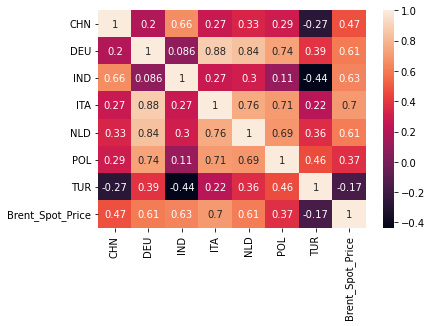

In [ ]:
#CPI heatmap to show correlation
sns.heatmap(corr_cpi_matrix, annot=True, annot_kws={"size": 10})

### Correlation Crude Price and GDP : Check Assumption and Interpretation

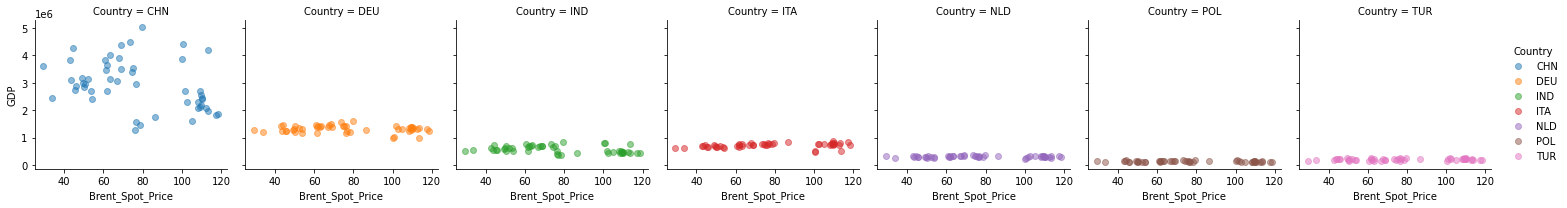

In [ ]:
#Scatterplot between Crude Price and GDP
sns.FacetGrid(all_df, col = "Country", hue="Country").map(plt.scatter, "Brent_Spot_Price", "GDP", alpha =0.5).add_legend()

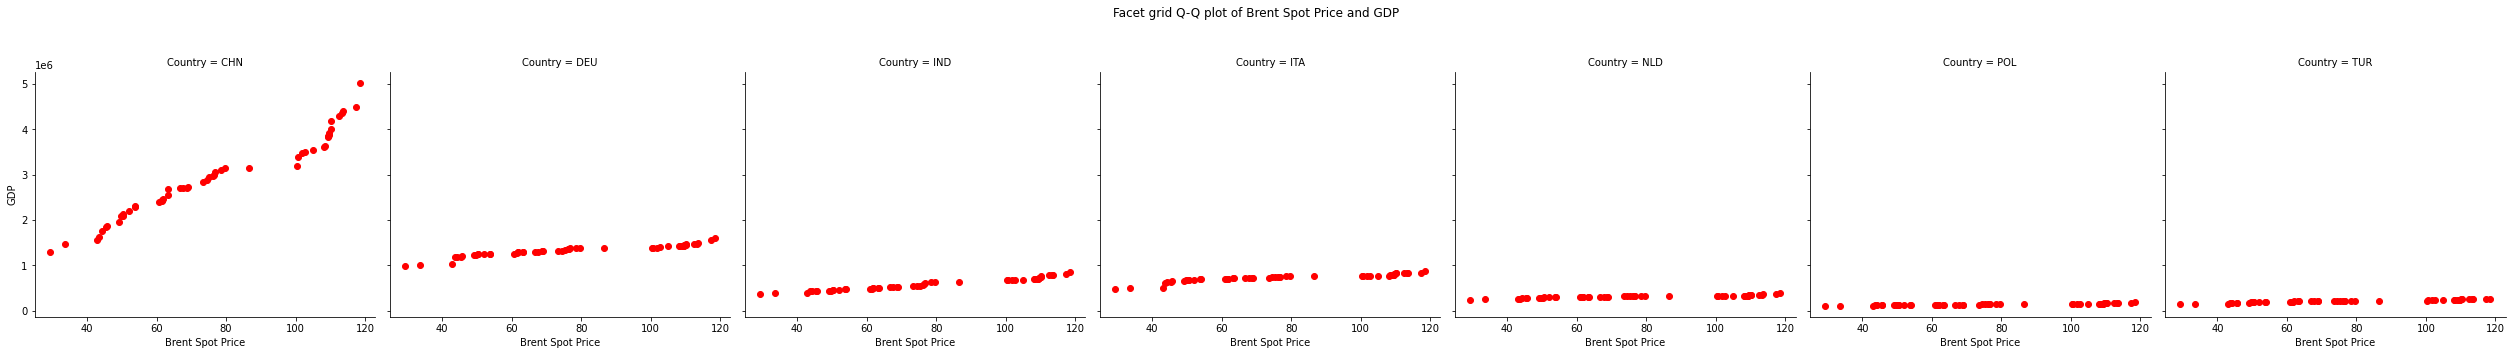

In [ ]:
#Check normal distribution using QQ Plot
def qqplot(x, y,color, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr,color=color, **kwargs)

fig6 = sns.FacetGrid(all_df, col="Country",height=5)

fig6.map(qqplot, "Brent_Spot_Price", "GDP", color="red")
#Add lables without underscores
fig6.set_axis_labels('Brent Spot Price', 'GDP')
#Set title of the graphic
fig6.fig.suptitle('Facet grid Q-Q plot of Brent Spot Price and GDP')

# Add a space between the title and the plots
plt.subplots_adjust(top=0.8)

In [ ]:
gdp_df_pivot= gdp_df.pivot_table(index='TIME', columns='Country', values='GDP')
corr_gdp_df = gdp_df_pivot.merge(crude_df, on = 'TIME', how = 'left')
corr_gdp_df = corr_gdp_df.groupby(pd.PeriodIndex(corr_gdp_df.TIME, freq='Q')).mean().reset_index()

In [ ]:
# Check normal distribution using Kolmogorov Smirnov Test

countries = ['CHN', 'TUR', 'IND', 'DEU', 'NLD', 'POL', 'ITA']

for country in countries:
    kg_stat, kg_pvalue = kstest(corr_gdp_df[country], 'norm')


#Data frame for result Kolmogorov Smirnov Test
dks_gdp = {'Country': countries,
       'p-value': kg_pvalue,
       'alpha': 0.05}
all_dks_gdp = pd.DataFrame(dks_gdp)
all_dks_gdp['Result'] = np.where(all_dks_gdp['p-value'] > all_dks_gdp['alpha'],
                                 'Normal Distribution','Not Normal Distribution')
all_dks_gdp

,Country,p-value,alpha,Result
0,CHN,0.0,0.05,Not Normal Distribution
1,TUR,0.0,0.05,Not Normal Distribution
2,IND,0.0,0.05,Not Normal Distribution
3,DEU,0.0,0.05,Not Normal Distribution
4,NLD,0.0,0.05,Not Normal Distribution
5,POL,0.0,0.05,Not Normal Distribution
6,ITA,0.0,0.05,Not Normal Distribution


In [ ]:
# Initialize an empty dataframe with the columns 'Country', 'coef_corr', 'p-value', and 'alpha'
all_dgst = pd.DataFrame(columns=['Country', 'coef_corr', 'p-value', 'alpha'])

# Iterate through the countries
for country in ['CHN', 'IND', 'TUR', 'POL', 'DEU', 'NLD', 'ITA']:
    # Calculate the Spearman rank correlation coefficient and p-value for the country
    coef, p = spearmanr(corr_gdp_df['Brent_Spot_Price'], corr_gdp_df[country])

    # Create a row in the dataframe with the results for the country
    all_dgst = all_dgst.append({'Country': country,
                              'coef_corr': coef,
                              'p-value': p,
                              'alpha': 0.05}, ignore_index=True)

# Add a column to the dataframe with the result of the hypothesis test
all_dgst['Result'] = np.where(all_dgst['p-value'] > all_dgst['alpha'],
                              'Samples are uncorrelated (fail to reject H0)',
                              'Samples are correlated (reject H0)')
all_dgst

,Country,coef_corr,p-value,alpha,Result
0,CHN,-0.433032,0.001504,0.05,Samples are correlated (reject H0)
1,IND,-0.433846,0.001470,0.05,Samples are correlated (reject H0)
2,TUR,0.207421,0.144154,0.05,Samples are uncorrelated (fail to reject H0)
3,POL,-0.007511,0.958280,0.05,Samples are uncorrelated (fail to reject H0)
4,DEU,-0.045158,0.753019,0.05,Samples are uncorrelated (fail to reject H0)
5,NLD,0.090950,0.525605,0.05,Samples are uncorrelated (fail to reject H0)
6,ITA,0.552851,0.000026,0.05,Samples are correlated (reject H0)


In [ ]:
#Correlation Matrix between Crude Price and GDP
corr_gdp_matrix = corr_gdp_df.corr(method='spearman')
corr_gdp_matrix

,CHN,DEU,IND,ITA,NLD,POL,TUR,Brent_Spot_Price
CHN,1.000000,0.449140,0.932941,-0.310226,0.284434,0.790679,-0.034570,-0.433032
DEU,0.449140,1.000000,0.398009,0.481267,0.902443,0.628869,0.139729,-0.045158
IND,0.932941,0.398009,1.000000,-0.401357,0.222081,0.721357,-0.202443,-0.433846
ITA,-0.310226,0.481267,-0.401357,1.000000,0.613213,0.173937,0.494208,0.552851
NLD,0.284434,0.902443,0.222081,0.613213,1.000000,0.572308,0.005973,0.090950
POL,0.790679,0.628869,0.721357,0.173937,0.572308,1.000000,0.110860,-0.007511
TUR,-0.034570,0.139729,-0.202443,0.494208,0.005973,0.110860,1.000000,0.207421
Brent_Spot_Price,-0.433032,-0.045158,-0.433846,0.552851,0.090950,-0.007511,0.207421,1.000000


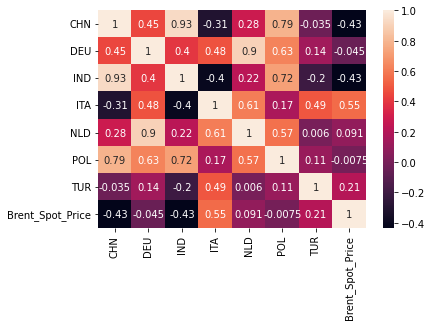

In [ ]:
#GDP heatmap to show correlation
sns.heatmap(corr_gdp_matrix, annot=True, annot_kws={"size": 10})

## Regression

###Regression Crude Price and CPI

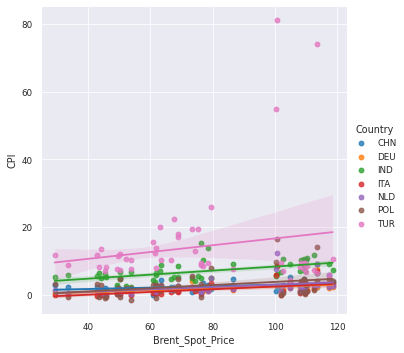

In [ ]:
# Set the context of the plot to "paper" and set the style to "darkgrid"
sns.set_context("paper")
sns.set_style("darkgrid")

# Set the color palette to white
#sns.set_palette(["white"])
sns.lmplot(x="Brent_Spot_Price", y="CPI", hue="Country", data=all_df)

In [ ]:
all_df_dumm = pd.get_dummies(all_df,columns=['Country'],prefix='Country',drop_first=False)

def create_interaction_terms(df, dummy_vars):
    df_new = df.copy()
    for var in dummy_vars:
        df_new[f'Brent_Spot_Price_{var}'] = df_new['Brent_Spot_Price'] * df_new[var]
    return df_new

all_df_dumm = create_interaction_terms(all_df_dumm, ['Country_CHN','Country_DEU',
                                                     'Country_IND','Country_ITA','Country_NLD','Country_POL','Country_TUR'])
all_df_dumm.head()

,TIME,GDP,CPI,Brent_Spot_Price,const,Country_CHN,Country_DEU,Country_IND,Country_ITA,Country_NLD,Country_POL,Country_TUR,Brent_Spot_Price_Country_CHN,Brent_Spot_Price_Country_DEU,Brent_Spot_Price_Country_IND,Brent_Spot_Price_Country_ITA,Brent_Spot_Price_Country_NLD,Brent_Spot_Price_Country_POL,Brent_Spot_Price_Country_TUR
0,2010Q1,1292485.97,2.200000,76.25,1,1,0,0,0,0,0,0,76.25,0.00,0.00,0.00,0.00,0.0,0.0
1,2010Q1,1176698.47,0.811158,76.25,1,0,1,0,0,0,0,0,0.00,76.25,0.00,0.00,0.00,0.0,0.0
2,2010Q1,396890.17,15.315320,76.25,1,0,0,1,0,0,0,0,0.00,0.00,76.25,0.00,0.00,0.0,0.0
3,2010Q1,717785.69,1.290162,76.25,1,0,0,0,1,0,0,0,0.00,0.00,0.00,76.25,0.00,0.0,0.0
4,2010Q1,296400.76,0.884208,76.25,1,0,0,0,0,1,0,0,0.00,0.00,0.00,0.00,76.25,0.0,0.0


In [ ]:
model_cpi_all_int = sm.OLS(all_df_dumm.CPI,all_df_dumm[['const','Brent_Spot_Price']+[col for col in all_df_dumm.columns if col.startswith('Brent_Spot_Price_')]]).fit()
print(model_cpi_all_int.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     29.02
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           1.81e-31
Time:                        22:10:31   Log-Likelihood:                -1139.4
No. Observations:                 357   AIC:                             2295.
Df Residuals:                     349   BIC:                             2326.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### Check Assumption and Interpretation

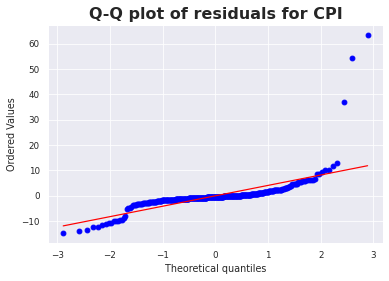

In [ ]:
# Get the residuals
residuals_cpi = model_cpi_all_int.resid

# Create the QQ plot with a normal distribution line
stats.probplot(residuals_cpi, plot=plt)

# Add a title to the plot
plt.title('Q-Q plot of residuals for CPI', fontsize=16, fontweight='bold')

plt.show()

#### Polynomial Regression

In [ ]:
# Create a PolynomialFeatures object with degree 2 for the non-dummy variables
poly1 = PolynomialFeatures(degree=2, include_bias=False)

# Transform the input features into polynomial features
X_poly1 = poly1.fit_transform(all_df_dumm[['Brent_Spot_Price']])

# Concatenate the dummy variables with the transformed features
X_poly1 = np.concatenate((X_poly1, all_df_dumm[[col for col in all_df_dumm.columns if col.startswith('Brent_Spot_Price_')]]), axis=1)

# Add a column of ones for the intercept term
X_poly1 = np.concatenate((np.ones((X_poly1.shape[0],1)),X_poly1),axis=1)

# Fit the OLS model with the polynomial and dummy variables
model_cpi_all_poly_int = sm.OLS(all_df_dumm.CPI,X_poly1).fit()
print(model_cpi_all_poly_int.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     25.45
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           7.29e-31
Time:                        22:10:31   Log-Likelihood:                -1139.1
No. Observations:                 357   AIC:                             2296.
Df Residuals:                     348   BIC:                             2331.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7427      3.302     -0.528      0.5

In [ ]:
#Evaluate Regression Model

# Create an empty dataframe to store the results
results_df1 = pd.DataFrame(columns=['Model', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R Square'])

# Linear Regression
# Get the predictions from the model
y_pred_linear1 = model_cpi_all_int.predict(all_df_dumm[['const','Brent_Spot_Price']+[col for col in all_df_dumm.columns if col.startswith('Brent_Spot_Price_')]])

# Calculate the evaluation metrics
mae = metrics.mean_absolute_error(all_df_dumm['CPI'] , y_pred_linear1)
mse = metrics.mean_squared_error(all_df_dumm['CPI'] , y_pred_linear1)
rmse = np.sqrt(metrics.mean_squared_error(all_df_dumm['CPI'] , y_pred_linear1))
r2 = metrics.r2_score(all_df_dumm['CPI'] , y_pred_linear1)

# Append the results for this model to the results dataframe
results_df1 = results_df1.append({'Model': 'Linear Regression', 'Mean Absolute Error': mae, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse, 'R Square': r2}, ignore_index=True)

# Polynomial Regression
# Get the predictions from the model
y_pred_poly1 = model_cpi_all_poly_int.predict(X_poly1)

# Calculate the evaluation metrics
mae = metrics.mean_absolute_error(all_df_dumm['CPI'] , y_pred_poly1)
mse = metrics.mean_squared_error(all_df_dumm['CPI'] , y_pred_poly1)
rmse = np.sqrt(metrics.mean_squared_error(all_df_dumm['CPI'] , y_pred_poly1))
r2 = metrics.r2_score(all_df_dumm['CPI'] , y_pred_poly1)

# Append the results for this model to the results dataframe
results_df1 = results_df1.append({'Model': 'Polynomial Regression', 'Mean Absolute Error': mae, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse, 'R Square': r2}, ignore_index=True)

# View the results dataframe
results_df1.round(2)

,Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R Square
0,Linear Regression,2.43,34.65,5.89,0.37
1,Polynomial Regression,2.45,34.58,5.88,0.37


### Regression Crude Price and GDP

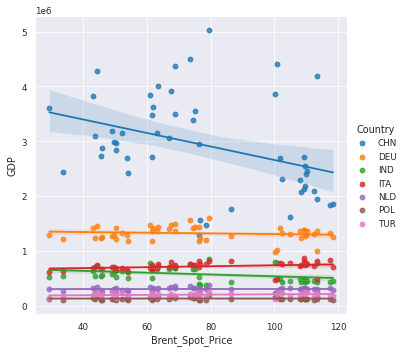

In [ ]:
# Set the context of the plot to "paper" and set the style to "darkgrid"
sns.set_context("paper")
sns.set_style("darkgrid")

# Set the color palette to white
#sns.set_palette(["white"])
sns.lmplot(x="Brent_Spot_Price", y="GDP", hue="Country", data=all_df)

In [ ]:
model_gdp_all_int = sm.OLS(all_df_dumm.GDP,
                           all_df_dumm[['const','Brent_Spot_Price']+[col for col in all_df_dumm.columns
                                                          if col.startswith('Brent_Spot_Price_')]]).fit()
print(model_gdp_all_int.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     137.2
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           3.70e-96
Time:                        22:10:33   Log-Likelihood:                -5194.7
No. Observations:                 357   AIC:                         1.041e+04
Df Residuals:                     349   BIC:                         1.044e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### Check Assumption and Interpretation

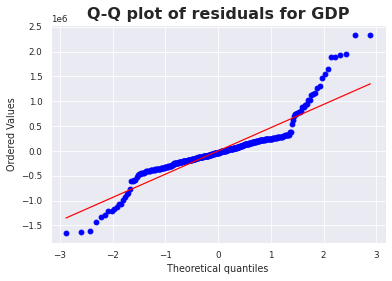

In [ ]:
# Get the residuals
residuals_gdp_int = model_gdp_all_int.resid

# Create the QQ plot with a normal distribution line
stats.probplot(residuals_gdp_int, plot=plt)

# Add a title to the plot
plt.title('Q-Q plot of residuals for GDP', fontsize=16, fontweight='bold')

plt.show()

#### Polynomial Regression

In [ ]:
# Create a PolynomialFeatures object with degree 2 for the non-dummy variables
poly2 = PolynomialFeatures(degree=2, include_bias=False)

# Transform the input features into polynomial features
X_poly2 = poly2.fit_transform(all_df_dumm[['Brent_Spot_Price']])

# Concatenate the dummy variables with the transformed features
X_poly2 = np.concatenate((X_poly2, all_df_dumm[[col for col in all_df_dumm.columns if col.startswith('Brent_Spot_Price_')]]), axis=1)

# Add a column of ones for the intercept term
X_poly2 = np.concatenate((np.ones((X_poly2.shape[0],1)),X_poly2),axis=1)

# Fit the OLS model with the polynomial and dummy variables
model_gdp_all_poly_int_degree2 = sm.OLS(all_df_dumm.GDP,X_poly2).fit()
print(model_gdp_all_poly_int_degree2.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           1.77e-95
Time:                        22:10:33   Log-Likelihood:                -5193.7
No. Observations:                 357   AIC:                         1.041e+04
Df Residuals:                     348   BIC:                         1.044e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.679e+05   2.83e+05      2.362      0.0

In [ ]:
# Create a PolynomialFeatures object with degree 3 for the non-dummy variables
poly3 = PolynomialFeatures(degree=3, include_bias=False)

# Transform the input features into polynomial features
X_poly3 = poly3.fit_transform(all_df_dumm[['Brent_Spot_Price']])

# Concatenate the dummy variables with the transformed features
X_poly3 = np.concatenate((X_poly3,
                          all_df_dumm[[col for col in all_df_dumm.columns if col.startswith('Brent_Spot_Price_')]]), axis=1)

# Add a column of ones for the intercept term
X_poly3 = np.concatenate((np.ones((X_poly3.shape[0],1)),X_poly3),axis=1)

# Fit the OLS model with the polynomial and dummy variables
model_gdp_all_poly_int_degree3 = sm.OLS(all_df_dumm.GDP,X_poly3).fit()
print(model_gdp_all_poly_int_degree3.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     106.9
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           2.01e-94
Time:                        22:10:33   Log-Likelihood:                -5193.7
No. Observations:                 357   AIC:                         1.041e+04
Df Residuals:                     347   BIC:                         1.045e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        6.98e+05   7.86e+05      0.887      0.3

In [ ]:
# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Model', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R Square'])

# Linear Regression
# Get the predictions from the model
y_pred_linear = model_gdp_all_int.predict(all_df_dumm[['const','Brent_Spot_Price']+[col for col in all_df_dumm.columns if col.startswith('Brent_Spot_Price_')]])

# Calculate the evaluation metrics
mae = metrics.mean_absolute_error(all_df_dumm['GDP'] , y_pred_linear)
mse = metrics.mean_squared_error(all_df_dumm['GDP'] , y_pred_linear)
rmse = np.sqrt(metrics.mean_squared_error(all_df_dumm['GDP'] , y_pred_linear))
r2 = metrics.r2_score(all_df_dumm['GDP'] , y_pred_linear)

# Append the results for this model to the results dataframe
results_df = results_df.append({'Model': 'Linear Regression', 'Mean Absolute Error': mae, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse, 'R Square': r2}, ignore_index=True)

# Polynomial Regression
# Degree 2
# Get the predictions from the model
y_pred_poly_degree2 = model_gdp_all_poly_int_degree2.predict(X_poly2)

# Calculate the evaluation metrics
mae = metrics.mean_absolute_error(all_df_dumm['GDP'] , y_pred_poly_degree2)
mse = metrics.mean_squared_error(all_df_dumm['GDP'] , y_pred_poly_degree2)
rmse = np.sqrt(metrics.mean_squared_error(all_df_dumm['GDP'] , y_pred_poly_degree2))
r2 = metrics.r2_score(all_df_dumm['GDP'] , y_pred_poly_degree2)

# Append the results for this model to the results dataframe
results_df = results_df.append({'Model': 'Polynomial Regression Degree 2', 'Mean Absolute Error': mae, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse, 'R Square': r2}, ignore_index=True)

# Degree 3
# Get the predictions from the model
y_pred_poly_degree3 = model_gdp_all_poly_int_degree3.predict(X_poly3)

# Calculate the evaluation metrics
mae = metrics.mean_absolute_error(all_df_dumm['GDP'] , y_pred_poly_degree3)
mse = metrics.mean_squared_error(all_df_dumm['GDP'] , y_pred_poly_degree3)
rmse = np.sqrt(metrics.mean_squared_error(all_df_dumm['GDP'] , y_pred_poly_degree3))
r2 = metrics.r2_score(all_df_dumm['GDP'] , y_pred_poly_degree3)

# Append the results for this model to the results dataframe
results_df = results_df.append({'Model': 'Polynomial Regression Degree 3', 'Mean Absolute Error': mae, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse, 'R Square': r2}, ignore_index=True)

# View the results dataframe
results_df.round(3)

,Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R Square
0,Linear Regression,315965.159,2.548644e+11,504840.924,0.733
1,Polynomial Regression Degree 2,320588.125,2.534980e+11,503485.868,0.735
2,Polynomial Regression Degree 3,320571.866,2.534968e+11,503484.645,0.735


In [ ]:
#Evaluating the model with a five-fold cross validation using Polynomial Regression Degree 2

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Split the data into 5 folds
kf = KFold(n_splits=5)

# Initialize an empty list to store the errors
errors = []

# Perform cross validation
for train_index, test_index in kf.split(all_df_dumm):
    # Get the training and test data
    X_train, X_test = all_df_dumm[['Brent_Spot_Price']].iloc[train_index], all_df_dumm[['Brent_Spot_Price']].iloc[test_index]
    y_train, y_test = all_df_dumm['GDP'].iloc[train_index], all_df_dumm['GDP'].iloc[test_index]

    # Create a PolynomialFeatures object with degree 2 for the non-dummy variables
    poly_k2 = PolynomialFeatures(degree=2, include_bias=False)

    # Transform the input features into polynomial features
    X_poly2_train = poly_k2.fit_transform(X_train)
    X_poly2_test = poly_k2.transform(X_test)

    # Concatenate the dummy variables with the transformed features
    X_poly2_train = np.concatenate((X_poly2_train, all_df_dumm[[col for col in all_df_dumm.columns if col.startswith('Brent_Spot_Price_')]].iloc[train_index]), axis=1)
    X_poly2_test = np.concatenate((X_poly2_test, all_df_dumm[[col for col in all_df_dumm.columns if col.startswith('Brent_Spot_Price_')]].iloc[test_index]), axis=1)

    # Add a column of ones for the intercept term
    X_poly2_train = np.concatenate((np.ones((X_poly2_train.shape[0],1)),X_poly2_train),axis=1)
    X_poly2_test = np.concatenate((np.ones((X_poly2_test.shape[0],1)),X_poly2_test),axis=1)

    # Fit the OLS model with the polynomial and dummy variables
    model_gdp_all_poly_int_degree2_train = sm.OLS(y_train,X_poly2_train).fit()

    # Predict on the test data
    y_pred = model_gdp_all_poly_int_degree2_train.predict(X_poly2_test)

    # Calculate the mean squared error
    errors.append(mean_squared_error(y_test, y_pred))

# Print the mean of the errors
print("Mean squared error:", np.mean(errors))

Mean squared error: 387990036881.0651
